In [1]:
from keras.applications import ResNet101
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
image_size = (100, 100)
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 521 images belonging to 4 classes.
Found 521 images belonging to 4 classes.


In [4]:
# Load pre-trained ResNet101 model without top layers
resnet_base = ResNet101(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = Sequential()

# Add ResNet101 base model
model.add(resnet_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 51048068 (194.73 MB)
Trainable params: 50942724 (194.33 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


In [7]:
# Freeze ResNet101 base layers
resnet_base.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=test_generator)

model.save('pcos_model_resnet101.h5')

Epoch 1/20


17/17 [==============================] - 90s 4s/step - loss: 4.0105 - accuracy: 0.4722 - val_loss: 1.2750 - val_accuracy: 0.4990
Epoch 2/20
17/17 [==============================] - 58s 3s/step - loss: 1.1757 - accuracy: 0.5182 - val_loss: 1.0684 - val_accuracy: 0.5259
Epoch 3/20
17/17 [==============================] - 48s 3s/step - loss: 1.0613 - accuracy: 0.5221 - val_loss: 0.9711 - val_accuracy: 0.5432
Epoch 4/20
17/17 [==============================] - 31s 2s/step - loss: 1.0987 - accuracy: 0.5144 - val_loss: 0.9755 - val_accuracy: 0.4990
Epoch 5/20
17/17 [==============================] - 29s 2s/step - loss: 1.0737 - accuracy: 0.4875 - val_loss: 0.9809 - val_accuracy: 0.4990
Epoch 6/20
17/17 [==============================] - 26s 2s/step - loss: 1.0609 - accuracy: 0.5067 - val_loss: 0.9532 - val_accuracy: 0.4990
Epoch 7/20
17/17 [==============================] - 25s 2s/step - loss: 1.0729 - accuracy: 0.5163 - val_loss: 0.9933 - val_accuracy: 0.5240
Epoch 8/20
17/17 [

c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


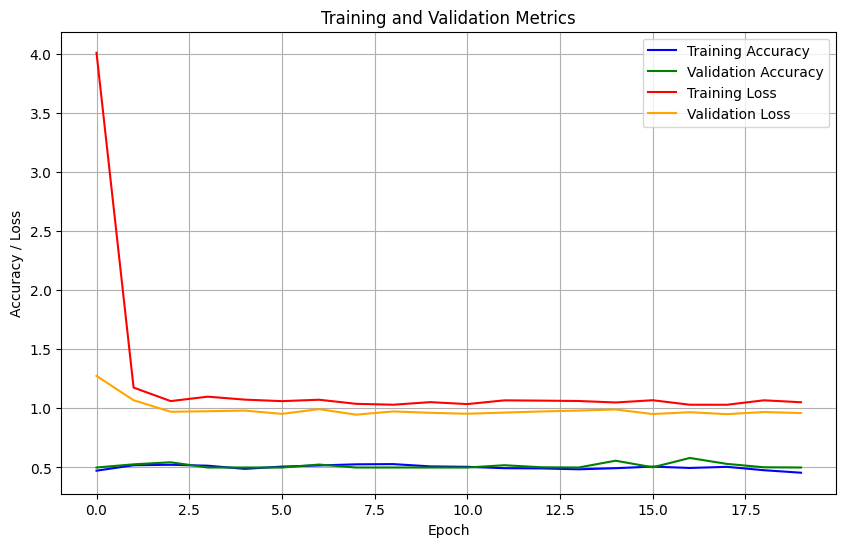

In [8]:
import matplotlib.pyplot as plt

# Plot all metrics on the same graph
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()